# 0) Bibliothèques

In [138]:
# Téléchargement des données
import os
import tarfile
from six.moves import urllib


# Outils
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# train_test_split(*arrays,
#                   test_size,
#                   train_size,
#                   random_state = None
#                   shuffle = True
#                   stratify = None)
# --> Split arrays or matrices into random train and test subsets
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone


# Transformateur et Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer, LabelEncoder


# Modèle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Entrainement
from sklearn. model_selection import GridSearchCV, RandomizedSearchCV



# 1) Importation des données

In [2]:
# IN: students_path: <str> chemin vers un dossier contenant un fichier csv
#     name: <str> nom du fichier csv
# OUT: <DataFrame> Objet panda contenant les données
def load_students_data(students_path = '', name = 'students_adaptability_level_online_education'):
    csv_path = os.path.join(students_path, name + ".csv") # Construction du chemin
    return pd.read_csv(csv_path) # Création de l'instance panda <DataFrame> contenant les données

    # Chargement des données
students = load_students_data() # <class 'pandas.DataFrame'>

# 2) Aperçu des données

### Observations

Les données sont toutes catégoriques. \
Aucune donnée manquante. \
Il y a 14 champs. Le champs ```Age``` compte 6 valeurs distinctes, les autres champs comportent 2 ou 3 valeurs distinctes. \
Mis à part le champs ```Device```, tous les champs de 3 ou 6 valeurs distinctes devront être transformé en suivant un ordre précis.

In [8]:
students.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [7]:
students.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [17]:
# print(students.columns)
for value in students.columns:
    print(students[value].unique())

['Boy' 'Girl']
['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
['University' 'College' 'School']
['Non Government' 'Government']
['No' 'Yes']
['Yes' 'No']
['Low' 'High']
['Mid' 'Poor' 'Rich']
['Wifi' 'Mobile Data']
['4G' '3G' '2G']
['3-6' '1-3' '0']
['No' 'Yes']
['Tab' 'Mobile' 'Computer']
['Moderate' 'Low' 'High']


# 2) Création des jeux de tests et d'entrainement

Création des variables ```train``` et ```test``` contenant respectivement le jeu d'entrainement et de test.\
On utilise la méthode par stratification avec ```StratifiedShuffleSplit``` de scikit-learn.

In [159]:
# Création du champs discriminant
def num_adaptability(y):
    return ['Low', 'Moderate', 'High'].index(y)
students['adaptability_num'] = students['Adaptivity Level'].apply(num_adaptability)

# Echantillonage par stratification
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(students, students['adaptability_num']):
    train = students.loc[train_index]
    test = students.loc[test_index]

# Suppression du champs discriminant
train.drop('adaptability_num', axis = 1, inplace = True)
test.drop('adaptability_num', axis = 1, inplace = True)
test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 972 to 634
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               241 non-null    object
 1   Age                  241 non-null    object
 2   Education Level      241 non-null    object
 3   Institution Type     241 non-null    object
 4   IT Student           241 non-null    object
 5   Location             241 non-null    object
 6   Load-shedding        241 non-null    object
 7   Financial Condition  241 non-null    object
 8   Internet Type        241 non-null    object
 9   Network Type         241 non-null    object
 10  Class Duration       241 non-null    object
 11  Self Lms             241 non-null    object
 12  Device               241 non-null    object
 13  Adaptivity Level     241 non-null    object
dtypes: object(14)
memory usage: 28.2+ KB


# 3) Préparation des données

Pour les valeurs ordonnées, un transformateur sur mesure sera utilisé.\
Pour les autres, ```LabelEncoder()``` sera utilisé.

On crée les variables suivantes:
- ```train_numeric``` contenant les champs numérisés
- ```target``` contenant le champs ```'Adaptivity Level'``` (la cible).

In [78]:
target = ['Adaptivity Level', ]
fields_noOrder = ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms', 'Device']

fields_order = ['Age', 'Education Level', 'Financial Condition', 'Network Type', 'Class Duration', 'Adaptivity Level']

train_order = train[fields_order].copy()
train_noOrder = train[fields_noOrder].copy()
target_train = train[target].copy()
target_test = test[target].copy()

# Transformation des valeurs ordonnées
class NumericOrder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        None

    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_new = pd.DataFrame()
        for field in fields_order + target:
            X_new[field] = X[field].apply(self.order)
        return X_new
    
        # Méthode pour numériser les valeurs distinctes à ordonner
    def order(self, categorie):
        if categorie in ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']:
            return ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'].index(categorie)
        elif categorie in ['School', 'College', 'University']:
            return ['School', 'College', 'University'].index(categorie)
        elif categorie in ['Poor', 'Mid', 'Rich']:
            return ['Poor', 'Mid', 'Rich'].index(categorie)
        elif categorie in ['4G', '3G', '2G']:
            return ['4G', '3G', '2G'].index(categorie)
        elif categorie in ['3-6', '1-3', '0']:
            return ['3-6', '1-3', '0'].index(categorie)
        elif categorie in ['Tab', 'Mobile', 'Computer']:
            return ['Tab', 'Mobile', 'Computer'].index(categorie)
        elif categorie in ['Low', 'Moderate', 'High']:
            return ['Low', 'Moderate', 'High'].index(categorie)
        else: print('Erreur dans l\'argument categorie de la méthode order')

numOrder = NumericOrder()
train_numeric_order = numOrder.fit_transform(train_order)

# Transformation des valeurs non ordonnées
numNoOrder = LabelEncoder()
train_numeric_noOrder = train_noOrder.apply(numNoOrder.fit_transform)

# Concaténation des données
train_numeric = pd.concat([train_numeric_order, train_numeric_noOrder], axis = 1)
train_numeric.head()


,Age,Education Level,Financial Condition,Network Type,Class Duration,Adaptivity Level,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Device
437,4,2,1,0,0,1,1,1,0,1,1,1,0,2
227,0,0,0,0,1,0,0,1,0,1,1,0,0,1
559,0,0,1,0,1,1,1,1,0,1,1,0,0,1
235,4,2,0,1,0,1,0,1,1,0,0,0,1,1
421,1,0,1,1,1,1,1,1,0,1,1,0,0,1


# 4) Visualisation des données

Adaptivity Level       1.000000
Institution Type       0.284234
Financial Condition    0.244625
Location               0.242072
IT Student             0.129284
Self Lms               0.128237
Load-shedding          0.078809
Internet Type          0.063659
Education Level       -0.036526
Age                   -0.064211
Gender                -0.075383
Device                -0.099434
Network Type          -0.135190
Class Duration        -0.327785
Name: Adaptivity Level, dtype: float64


<Axes: xlabel='Adaptivity Level', ylabel='Class Duration'>

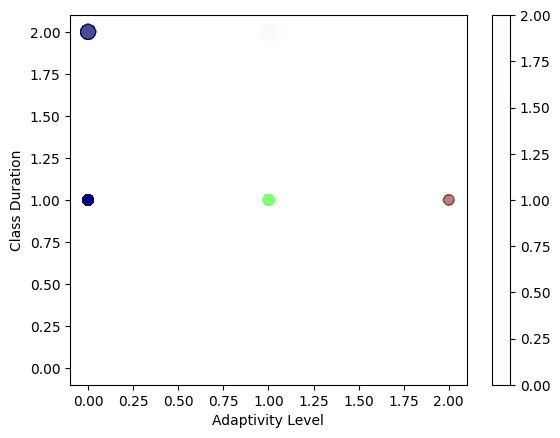

In [79]:

    # Coefficient de Pearson
matrix_corr = train_numeric.corr()
col_adaptivity = matrix_corr['Adaptivity Level'].sort_values(ascending = False)
print(col_adaptivity)

    # Graphiques
# pd.plotting.scatter_matrix(train_numeric[fields_order], figsize = (12, 8))

train_numeric.plot(kind = 'scatter', x = 'Adaptivity Level', y = 'Class Duration', alpha = 0.009,
          s = train_numeric['Class Duration'] * 60, #label = 'Class Duration',
           c = train_numeric['Adaptivity Level'], cmap = plt.get_cmap("jet"), colorbar = True)

# 5) Pipeline

On reprend un jeu de donnée propre en isolant cette fois la cible.

In [117]:
target = ['Adaptivity Level', ]
fields_noOrder = ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms', 'Device']

fields_order = ['Age', 'Education Level', 'Financial Condition', 'Network Type', 'Class Duration']

train_order = train[fields_order].copy()
train_noOrder = train[fields_noOrder].copy()
target_train = train[target].copy()
target_test = test[target].copy()

In [166]:
class DataSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, fieldsToSelect):
        self.__fieldsToSelect = fieldsToSelect

    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X[self.__fieldsToSelect]

class NumericTarget(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        None

    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        for field in target:
            X_new = X[field].apply(self.order)
        return X_new

    def order(self, categorie):
        return ['Low', 'Moderate', 'High'].index(categorie)

class NumericOrder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        None

    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_new = pd.DataFrame()
        for field in fields_order:
            X_new[field] = X[field].apply(self.order)
        return X_new
    
        # Méthode pour numériser les valeurs distinctes à ordonner
    def order(self, categorie):
        if categorie in ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']:
            return ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'].index(categorie)
        elif categorie in ['School', 'College', 'University']:
            return ['School', 'College', 'University'].index(categorie)
        elif categorie in ['Poor', 'Mid', 'Rich']:
            return ['Poor', 'Mid', 'Rich'].index(categorie)
        elif categorie in ['4G', '3G', '2G']:
            return ['4G', '3G', '2G'].index(categorie)
        elif categorie in ['3-6', '1-3', '0']:
            return ['3-6', '1-3', '0'].index(categorie)
        elif categorie in ['Tab', 'Mobile', 'Computer']:
            return ['Tab', 'Mobile', 'Computer'].index(categorie)
        elif categorie in ['Low', 'Moderate', 'High']:
            return ['Low', 'Moderate', 'High'].index(categorie)
        else: print('Erreur dans l\'argument categorie de la méthode order')

class NumericNoOrder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.__transformer = LabelEncoder()

    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        numNoOrder = LabelEncoder()
        X_new = X.apply(numNoOrder.fit_transform)
        return X_new

pip_target = Pipeline([('select', DataSelector(target)),
                       ('numeric', NumericTarget())])

pip_order = Pipeline([('select', DataSelector(fields_order)),
                      ('numeric', NumericOrder())])

pip_noOrder = Pipeline([('select', DataSelector(fields_noOrder)),
                         ('numeric', NumericNoOrder())])

full_pip = FeatureUnion(transformer_list= [('order', pip_order),
                                           ('noOrder', pip_noOrder)])

train_prepared = full_pip.fit_transform(train)
test_prepared = full_pip.fit_transform(test)
target_train_prepared = pip_target.fit_transform(target_train)
target_test_prepared = np.array(pip_target.fit_transform(target_test))

students_prepared = full_pip.fit_transform(students)
target_prepared = pip_target.fit_transform(students)

# 6) Modèle de regression
Bien que cela soit un problème de classification, nous allons essayé les modèles de regression et considérer les prédictions comme une probabilité d'appartenir à une classe donnée. \
Nous allons évaluer le score RMSE dans un premier temps, puis fixer la classe selon la fonction suivante:
$$ 
\begin{equation}
  f(x) = 
  \left\{
      \begin{aligned}
        0 &\text{ si } 0 \leq x < a],\\
        1 &\text{ si } a \leq x < b,\\
        2 &\text{ sinon, }\\
      \end{aligned}
    \right.
\end{equation}
$$
avec $x$, la prédiction du modèle et $a$, $b$, des paramètres réels entre 0 et 2.

## a) Entrainement

In [115]:
lin_reg = LinearRegression()
    # fit_intercept = True (Whether to calculate the intercept for this model. 
    #                       If set to False, no intercept will be used in calculations 
    #                       (i.e. data is expected to be centered).)
    # copy_X = True (if False, X may be overwritten)
    # n_jobs = None (The number of jobs to use for the computation. 
    #                This will only provide speedup in case of sufficiently large problems, 
    #                that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. 
    #                None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
    #                See Glossary for more details.)
    # positive = False (When set to True, forces the coefficients to be positive. 
    #                   This option is only supported for dense arrays.)
    #
tree_reg = DecisionTreeRegressor()
    # criterion = “squared_error”; in “friedman_mse”, “absolute_error”, “poisson” 
    #                              (Fonction de mesure de la qualité d'un split)
    # splitter = 'best'; or 'random' (Méthode pour choisir les splits à chaque noeud)
    # max_depth = None; or <int> (Définit la profondeur maximale de l'arbre.
    #                             None: l'algo s'arrête jusqu'à ce que les feuilles soient pures
    #                                 ou jusqu'à ce que chaque feuille aie moins de min_samples_split observations)
    #
    # min_samples_split = 2; or <int>, <float> (Si <float>, ceil(min_samples_split * n_samples) est le min)
    # min_samples_leaf = 1; <int> or <float> (Le minimum de feuilles sur lesquelles débouche un noeud
    #                                            pour que ce dernier soit considéré; idem que ci-dessus)
    # min_weight_fraction_leaf = 0.0; <float> (Idem que ci-dessus pour le poids; 
    #                                             ignoré si sample_weight n'est pas donné dans .fit())
    # max_features = None 
    #
    # random_state = None
    # max_leaf_nodes = None
    # min_impurity_decrease = 0.0
    # ccp_alpha = 0.0
    #
forest_reg = RandomForestRegressor()
    # n_estimators = 100; <int> (Nombre d'arbre)
    # idem que ci-dessus (sauf splitter, random_state)
    # bootstrap = True
    # oob_score = False
    # n_jobs = None
    # verbose = 0
    # warm_start = False
    # max_samples = None
    #
svr_reg = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.9)
    # kernel = 'rbf'; {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable
    # degree = 3; <int> (ignoré si kernel != 'poly')
    # gamma = 'scale'; {‘scale’, ‘auto’} or <float> (Si kernel in ('rbf', poly, sigmoid)
    #                                                scale -> 1 / (n_features * X.var())
    #                                                auto -> 1 / n_features)
    # coef0 = 0.0; <float> (Para indépendant, significatif si kernel in ('poly', 'sigmoid'))
    # tol = 0.001; <float> (Tolérance pour stoper criterion)
    #
    # C = 1.0; <float> strictement positif
    # epsilon = 0.1 <float>
    #
    # shrinking = True 
    # cache_size = 200; <float> (Spécifie la mémoire cache du noyau en MB)
    # verbose = False
    # max_iter = - 1; <int> (Hard limit on iterations within solver, or -1 for no limit)
    #

In [126]:
lin_reg.fit(train_prepared, target_train_prepared)
prediction_lin_reg = lin_reg.predict(test_prepared)

tree_reg.fit(train_prepared, target_train_prepared)
prediction_tree_reg = tree_reg.predict(test_prepared)

forest_reg.fit(train_prepared, target_train_prepared)
prediction_forest_reg = forest_reg.predict(test_prepared)

svr_reg.fit(train_prepared, target_train_prepared)
prediction_svr_reg = svr_reg.predict(test_prepared)

## b) Evaluation RMSE

In [125]:
def RMSE(x, y, titre = 'un modèle', p = 2, aff = True):
        if type(x) and type(y) is list or True:
            if len(x) == len(y) or True:
                if p == 0:
                    score = max(x - y)
                elif p > 0:
                    somme = 0
                    for i in range(len(x)):
                        somme += abs(x[i] - y[i]) ** p
                    score = (somme / len(x)) ** (1/p)
                else: print('Mauvaise valeur de p')
                if aff: print('\nScore pour', titre, ': ', score)
                return score
            else: print('x et y ne font pas la même longueur: ', len(x), len(y))
        else: print('x ou y n\'est pas une liste')

In [137]:
RMSE(target_test_prepared, prediction_lin_reg, titre = 'lin_reg', p = 0)
RMSE(target_test_prepared, prediction_tree_reg, titre = 'tree_reg')
RMSE(target_test_prepared, prediction_forest_reg, titre = 'forest_reg')
RMSE(target_test_prepared, prediction_svr_reg, titre = 'svr_reg')


Score pour lin_reg :  1.5129254513661434

Score pour tree_reg :  0.24868427352169403

Score pour forest_reg :  0.2638075314517645

Score pour svr_reg :  0.5298979137752664


0.5298979137752664

## c) Transformation des scores en classe

In [153]:
a = 0.5
b = 1.2
def f(x):
    if x < a: return 0
    elif x< b: return 1
    else: return 2

pred_lin_reg = np.vectorize(f)(prediction_lin_reg)
pred_tree_reg = np.vectorize(f)(prediction_tree_reg)
pred_forest_reg = np.vectorize(f)(prediction_forest_reg)
pred_svr_reg = np.vectorize(f)(prediction_svr_reg)

# 7) Modèle de classification

In [183]:
sgd_clf = SGDClassifier(random_state=42) 
forest_clf = RandomForestClassifier(random_state=42)

sgd_clf.fit(train_prepared, target_train_prepared)
pred_sgd = sgd_clf.predict(test_prepared)

forest_clf.fit(train_prepared, target_train_prepared)
pred_forest = forest_clf.predict(test_prepared)

# 8) Evaluation

In [187]:
liste_predictions = [pred_lin_reg, pred_tree_reg, pred_forest_reg, pred_svr_reg, pred_sgd, pred_forest]

def matrice_confusion(prediction):
    print(confusion_matrix(target_test_prepared, prediction))

for pred in liste_predictions:
    matrice_confusion(pred)
    print('\n')

[[52 41  3]
 [20 98  7]
 [ 1 15  4]]


[[ 88   7   1]
 [  7 110   8]
 [  0   2  18]]


[[ 86   9   1]
 [  7 110   8]
 [  0   2  18]]


[[ 26  70   0]
 [  3 101  21]
 [  0  20   0]]


[[72 23  1]
 [44 81  0]
 [ 8 10  2]]


[[ 88   8   0]
 [  7 114   4]
 [  0   3  17]]




In [142]:
score_cross_sgd = cross_val_score(sgd_clf, train_prepared, target_train_prepared, cv = 3, scoring = 'accuracy')
score_cross_forest = cross_val_score(forest_clf, train_prepared, target_train_prepared, cv = 3, scoring = 'accuracy')

array([[ 88,   8,   0],
       [  7, 114,   4],
       [  0,   3,  17]])

241